<a href="https://colab.research.google.com/github/RofiqAulia/Machine-Learning/blob/main/Kuis1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [33]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


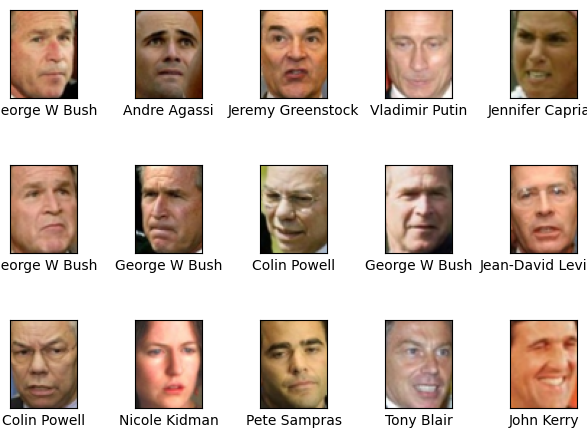

In [34]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

Preprocessing

In [39]:
# Normalization (jika diperlukan)
X = X / 255.0  # Normalisasi antara 0 dan 1


Feature Extraction

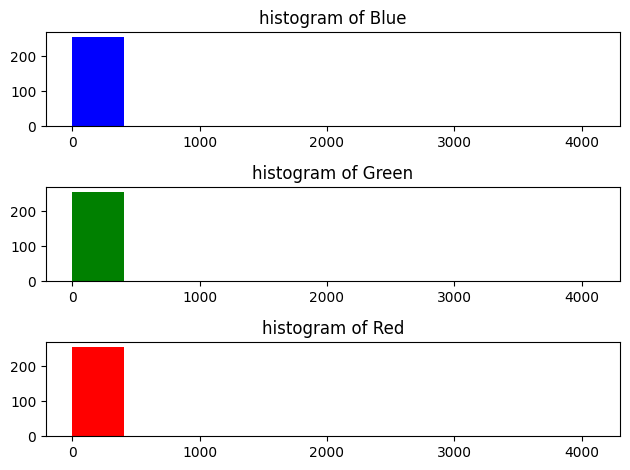

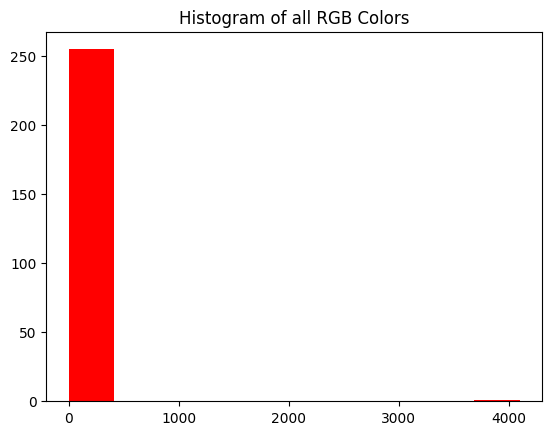

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Pilih citra pertama dari dataset untuk demonstrasi
imageObj = X[0].reshape(64, 64, 1).astype(np.uint8)  # Ubah kembali ke bentuk citra asli dan pastikan tipe data yang benar

# Hitung histogram untuk setiap channel (B, G, R)
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])   # Channel Biru
green_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])  # Channel Hijau
red_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])    # Channel Merah

# Separate Histograms for each color
plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")

plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")

plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")

# Untuk tampilan yang jelas
plt.tight_layout()
plt.show()

# combined histogram
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Use X instead of X_hist

In [54]:
from sklearn import svm

# Membangun model SVM
model = svm.SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear')

In [57]:
from sklearn.metrics import accuracy_score, classification_report

# Memprediksi label untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Get the unique class labels
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Generate target_names dynamically based on unique labels
target_names = [f'class_{i}' for i in unique_labels]

# Menghasilkan classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

Accuracy: 9.00%
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00         4
     class_1       0.00      0.00      0.00         2
     class_2       0.00      0.00      0.00         2
     class_3       0.00      0.00      0.00         4
     class_4       0.00      0.00      0.00         3
     class_5       0.00      0.00      0.00         3
     class_6       0.08      1.00      0.15         1
     class_7       0.00      0.00      0.00         7
     class_8       0.00      0.00      0.00         2
     class_9       0.00      0.00      0.00         3
    class_10       0.00      0.00      0.00         3
    class_11       0.00      0.00      0.00         4
    class_12       0.00      0.00      0.00         2
    class_13       0.03      1.00      0.07         1
    class_14       0.00      0.00      0.00         3
    class_15       0.00      0.00      0.00         2
    class_17       0.00      0.00      0.00         3
    class_1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
